In [82]:
#author: Antonin Grateau
#date: November 2021

import numpy as np
import matplotlib.pyplot as plt
from math import *

In [83]:
#Déclaration des constantes du problème

#Dimension du crystal
l = 80*10**(-6)

#pas
hx = 10**(-6)
ht = 10**(-9)

#Paramètres physique
a0 = 10**(-5)
eps0 = 8.85*10**(-12)
epsr = 55
mu = 6*10**(-7)
s = 3*10**(-2)
e = 1.602*10**(-19)
Nd = 3.2*10**21
Na = 9.10**20
Bph = 0
Eext = 2500/(4*10**(-3))
print(Eext)

625000.0


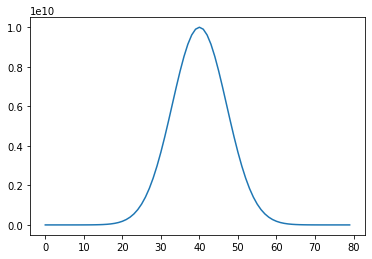

In [84]:
def Io(x):
    return((10**10)*exp(-((x-l/2)**2)/(a0**2)))

def I(i,j):
    return(Io(i*hx))

X = np.linspace(0,79,80)
Y = [I(x,0) for x in X]

plt.plot(X,Y)
plt.show()

In [85]:
def f(i,j):
    return(1-exp(-s*I(i,j)*j*ht))

def g(i,j):
    return(j*ht*exp(-s*I(i,j)*ht)*(I(i,j) - I(i-1,j))/hx)

def A(i,j):
    return(-mu*eps0*epsr*E[i,j-1])

def B(i,j):
    return(eps0*epsr)

def C(i,j):
    return(e*mu*(Nd-Na)*f(i,j))

def D(i,j):
    return(e*mu*s*(Nd-Na)*g(i,j))

def a(i,j):
    return((A(i,j)/(hx**2)) - (B(i,j)/(hx*ht)) - (C(i,j)/hx))

def b(i,j):
    return((-2*A(i,j)/(hx**2)) + (B(i,j)/(hx*ht)) + (C(i,j)/hx) + D(i,j))

def c(i,j):
    return(A(i,j)/(hx**2))

def d(i,j):
    if i == 0:
        return(B(i,j)/(hx*ht)*(-E[i,j-1] + Eext))
    else:
        return(B(i,j)/(hx*ht)*(-E[i,j-1] + E[i-1,j-1]))

In [86]:
#Initialisation de la liste de la matrice des champs

T = 100
E = np.zeros((80,T))
for i in range(0, 80):
    E[i,0] = Eext

#Simulation

for j in range(1,T):
    
    B_vector = np.zeros((80,1))
    A_matrice = np.zeros((80,80))  
    
    for i in range(1,79):
        B_vector[i,0] = - d(i,j)
        A_matrice[i,i-1] = a(i,j)
        A_matrice[i,i] = b(i,j)
        A_matrice[i,i+1] = c(i,j)
    A_matrice[0,0] = b(0,j)
    A_matrice[0,1] = c(0,j)
    A_matrice[79,78] = a(79,j)
    A_matrice[79,79] = b(79,j)
    B_vector[0,0] = -a(0,j)*Eext - d(0,j)
    B_vector[79,0] = -c(79,j)*Eext - d(79,j)
                         
    #Résolution du système
    A_inv = np.linalg.inv(A_matrice)
    E_colonne = A_inv.dot(B_vector)
    
    #Rajout de la colonne calculée dans la matrice de champs                  
    for i in range(0,len(E)):
        E[i,j] = E_colonne[i,0]   


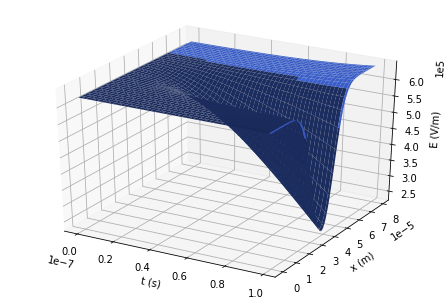

<Figure size 648x432 with 0 Axes>

In [90]:
#Tracé

from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(plt.figure())

X=np.linspace(0,79,80)
Y=np.linspace(0,T-1,T)
X_real = np.linspace(0,79*hx,80)
Y_real = np.linspace(0,(T-1)*ht,T)
xx, yy = np.meshgrid(X_real,Y_real)
plt.figure(figsize=(9,6))
ax.set_xlabel('t (s)')
ax.set_ylabel('x (m)')
ax.set_zlabel('E (V/m)')
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))
ax.plot_surface(np.transpose(yy), np.transpose(xx), E, color='royalblue')
plt.show()

In [88]:
'''X = np.linspace(0,79,80)

for j in range(0,100):
    Y=[f(i,j) for i in X]
    ax1 = "ax1,{index}"
    ax1 = ax1.format(index = i) 
    ax1 = plt.subplot(1,2,1)
    plt.plot(X,Y)
    Z=[g(i,j) for i in X]
    ax2 = "ax2,{index}"
    ax2 = ax2.format(index = i) 
    ax2 = plt.subplot(1,2,2)
    plt.plot(X,Z)
plt.show()'''

'X = np.linspace(0,79,80)\n\nfor j in range(0,100):\n    Y=[f(i,j) for i in X]\n    ax1 = "ax1,{index}"\n    ax1 = ax1.format(index = i) \n    ax1 = plt.subplot(1,2,1)\n    plt.plot(X,Y)\n    Z=[g(i,j) for i in X]\n    ax2 = "ax2,{index}"\n    ax2 = ax2.format(index = i) \n    ax2 = plt.subplot(1,2,2)\n    plt.plot(X,Z)\nplt.show()'

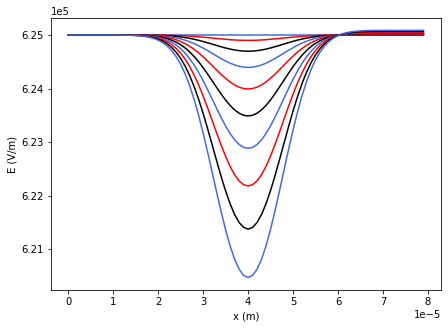

In [92]:
X = np.linspace(0,79,80)
X_real = np.linspace(0,79*hx,80)

plt.figure(figsize=(7,5))
for j in range(0,10):
    Y = E[:,j]
    if j%3 == 0 :
        plt.plot(X_real,Y, color='royalblue')
    if j%3 == 1 :
        plt.plot(X_real,Y, color='red')
    if j%3 == 2 :
        plt.plot(X_real,Y, color='black')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('x (m)')
plt.ylabel('E (V/m)')
plt.show()